<a href="https://colab.research.google.com/github/hhhhhhhhhhhhhhhhho/AI/blob/master/Lab2.%20Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Colaboratory ?
#환경 맞출 필요 없고, 간편한 공유 때문에 사용하고 있다.

#Lab 2 : Linear Regression


##Theoretical Overview
  
    
  

<img src="https://miro.medium.com/max/2584/1*Nf2tTTkALYq6RTMQmhjo1A.png">  
    
<img src="https://t1.daumcdn.net/cfile/tistory/997F2F395BDD010026">




**1. H(x) : 주어진 x 값에 대해 에측을 어떻게 할 것인가 ?**  
**2. cost(W,b) : H(x) 가 y 를 얼마나 잘 예측하는가 ?**


#Pytorch 를 사용한다.  
##Torch 는 딥러닝/머신러닝 라이브러리.    
Python 을 이용하여 해결 할 수 있다.

In [ ]:
import torch
import torch.optim as optim


In [ ]:
#For reproducibility
torch.manual_seed(1)

In [ ]:
#(x1,y1)=(1,1) , (x2,y2)=(2,2) , (x3,y3)=(3,3)
x_train = torch.FloatTensor(([1],[2],[3]))
y_train = torch.FloatTensor(([1],[2],[3]))

In [ ]:
#x train 의 형태는 3 by 1 이다.
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [ ]:
#y train 의 형태는  3 by 1 이다.
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


# Weight Initialization

In [ ]:
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [ ]:
b = torch.zeros(1, requires_grad=True)
print(b)
#학습용 변수.

tensor([0.], requires_grad=True)


#Hypothesis



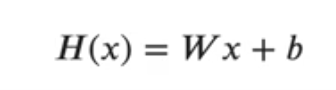

In [ ]:
hypothesis = x_train * W + b
print(hypothesis)
#가설의 값 은 현재 0 임.

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


#Cost
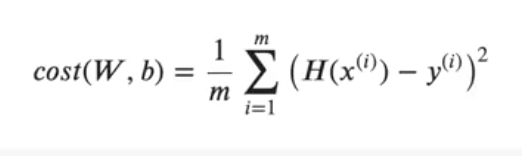

In [ ]:
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
print(y_train)

tensor([[1.],
        [2.],
        [3.]])


In [ ]:
print(hypothesis - y_train)

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)


In [ ]:
print((hypothesis - y_train)**2 )

tensor([[1.],
        [4.],
        [9.]], grad_fn=<PowBackward0>)


In [ ]:
#평균값을 알아봤음.
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


#Gradient Descent

In [ ]:
# learning rate => lr = 0.01
# W : = w-alpha*d/dw*cost(w)
optimizer = optim.SGD([W,b], lr=0.01)

In [ ]:
#옵티마이저 초기화
optimizer.zero_grad()

#cost 계산 => 미분값 계산
cost.backward()

#옵티마이저 갱신
optimizer.step()

In [ ]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


위에서 W 와 b 는 각각 0 이었지만
W 가 갱신된 것을 볼 수 있다.

In [ ]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [ ]:
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

#이렇게 cost 가 반복적으로 작아지고, cost 가 더 이상 작아지지 않을 때 까지 반복한다면 학습이 완료되것으로 생각할 수 있다.

tensor(3.6927, grad_fn=<MeanBackward0>)


#Traning with Full Code
## In reality , we will be traning on the dataset for multiple epochs. This can be done simply with loops
### 이 모델은 데이터 셋에서 학습될 수 있는데 , 간단히 루프를 돌면서 해결 할 수 있다.


In [ ]:
#데이터
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

#모델 초기화
W = torch.zeros(1, requires_grad=True)  # True 중요함 !
# 1 by 1 , requires_grad = True => 학습을 통해서 W 값을 찾겠다 .. !

b = torch.zeros(1, requires_grad=True)
# 1 by 1 , requires_grad = True => 학습을 통해서 W 값을 찾겠다 .. !

#Optimizer 설정
optimizer = optim.SGD([W,b], lr = 0.01) 
#Gradient Descent 사용 할 건데, SGD 알고리즘을 이용해서 ! 그리고 그 알고리즘은 W 와 b 를 구해주면 된다!
#근데 Leaning Rate 는 0.01 이다.

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    #H(x) 계산
    hypothesis = x_train *W + b

    #cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)


    #cost 로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    #100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} cost : {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

    

Epoch    0/1000 W: 0.093, b: 0.040 cost : 4.666667
Epoch  100/1000 W: 0.873, b: 0.289 cost : 0.012043
Epoch  200/1000 W: 0.900, b: 0.227 cost : 0.007442
Epoch  300/1000 W: 0.921, b: 0.179 cost : 0.004598
Epoch  400/1000 W: 0.938, b: 0.140 cost : 0.002842
Epoch  500/1000 W: 0.951, b: 0.110 cost : 0.001756
Epoch  600/1000 W: 0.962, b: 0.087 cost : 0.001085
Epoch  700/1000 W: 0.970, b: 0.068 cost : 0.000670
Epoch  800/1000 W: 0.976, b: 0.054 cost : 0.000414
Epoch  900/1000 W: 0.981, b: 0.042 cost : 0.000256
Epoch 1000/1000 W: 0.985, b: 0.033 cost : 0.000158


결과를 보면 W 가 1 에 가까워지고 있는 것을 볼 수 있다.

In [ ]:
#Example.
#인공지능 수업을 7시간 공부했을 때 예측 시험 성적은 ?
#H(x) = Wx + b
#가설설정 => 예측하고자 하는 값 => 시험성적 => 1 * 7 + b ( 0.033)
#여기서 데이터는 시험성적고 관련 된 데이터가 아니기 때문에 , 다소 맞지 않는 정보가 나타 날 것이다.

#데이터의 유형 ?

#Example.
인공지능 수업을 7시간 공부했을 때 예측 시험 성적은 ?  
H(x) = Wx + b  
가설설정 => 예측하고자 하는 값 => 시험성적 => 1 * 7 + b ( 0.033)  
여기서 데이터는 시험성적고 관련 된 데이터가 아니기 때문에 , 다소 맞지 않는 정보가 나타 날 것이다.

##데이터의 유형 ?
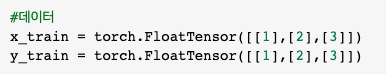

#Lab 3 : Minimizing Cost

##Theoretical Overview

## *H(x) = Wx*

---
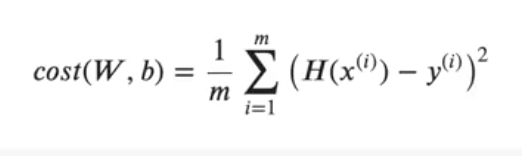



* H(x) : 주어진 x 값에 대해 예측을 어떻게 할 건지 ?  

* cost(*W*) : H(x) 가 y 를 얼마나 잘 예측하는지 ? ( 오차 범위 , 0 에 수렴할 수록 H(x) 모델이 원하는 정보를 잘 예측하는 것.) 


#Imports

In [ ]:
import matplotlib.pyplot as plt #2차원에 데이터를 시각화 한다.
import numpy as np
import torch
import torch.optim as optim

In [ ]:
#For reproduceibility
torch.manual_seed(1)
#랜덤 한 수를 일정하게 준다 ? 뭔말인지 .....

#Data

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

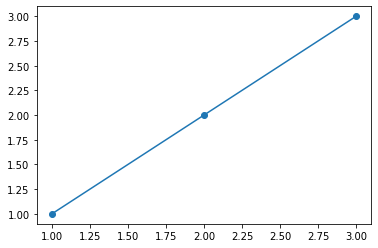

In [ ]:
# Data
plt.scatter(x_train, y_train)

#Best - fit line
xs = np.linspace(1,3,1000) #1에서 부터 3까지 1000개로 쪼갠다. 1000개의 데이터를 만든다.
plt.plot(xs,xs)

In [ ]:
print(xs)

#Cost by W

In [ ]:
# -5 ~ 7 사이를 1000 등분하여 w_l 에 담는다.
#list 형식으로 담은 것.

#w_list
W_l = np.linspace(-5,7,1000)

#cost_list
cost_l=[]
for W in W_l:
  hypothesis = W * x_train
  cost = torch.mean((hypothesis - y_train)**2)
  cost_l.append(cost.item())



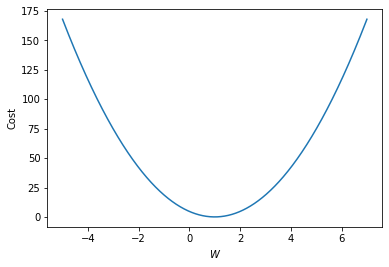

In [ ]:
plt.plot(W_l,cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

#Gradient Descent by Hand

In [ ]:
W = 0

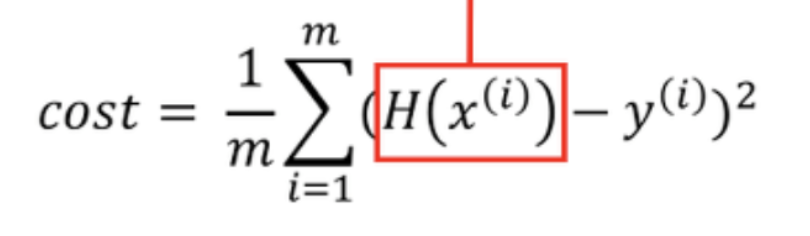

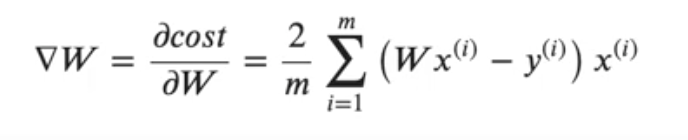

In [ ]:
gradient = torch.sum((W*x_train - y_train) * x_train)
print(gradient)

tensor(-14.)


다음에 갱신 될 W 값도 예측 할 수 있다.  
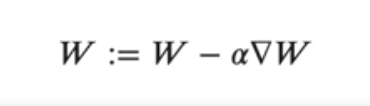
  


In [ ]:
lr = 0.1
# w = w - lr*gradient
W -= lr * gradient
print(W)

tensor(1.4000)


-



---
#Training




In [ ]:

#데이터
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

#모델 초기화
W = torch.zeros(1)

#learning rate 설정
lr = 0.1

nb_epochs=10
for epoch in range(nb_epochs + 1):
  #H(x) 계산
  hypothesis = x_train * W

  # cost gradient 계산
  cost = torch.mean((hypothesis - y_train) ** 2)
  gradient = torch.sum((W*x_train - y_train) * x_train)

  print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs,W.item(), cost.item()))

  # cost gradient 로 H(x) 개선

  W-= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


Cost 가 0 으로 수렴하고 W 가 1로 수렴하는 것을 볼 수 있다. -> 꽤 정확한 예측이라는 것.



---

#Lab 4-1 : Multivariate Linear Regression  



##Theorical Overview  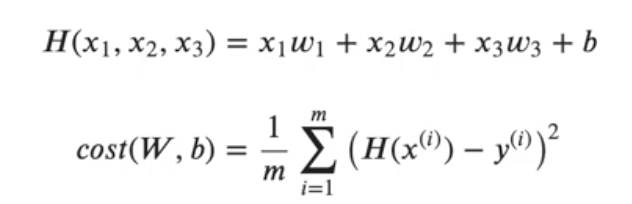

* H(x) : 주어진 x 값에 대해 예측을 어떻게 할 것 인가?
* Cost(W,b):H(x) 가 얼마나 예측을 잘 했는가 ? -> 오차에 관한 이야기  

다변수의 의미, 현상, Hypothesis 에 영향을 주는 요소들의 수

#Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
#For reproducibility
torch.manual_seed(1)
#걍 약간 으레 사용하는 느낌.

#Naive Data Representation

##We will use fake data for this example.

In [ ]:
#데이터
x1_train = torch.FloatTensor([[73],[93],[89],[96],[73]])
x2_train = torch.FloatTensor([[80],[88],[91],[98],[66]])
x3_train = torch.FloatTensor([[75],[93],[90],[100],[70]])
y_train =  torch.FloatTensor([[152],[185],[180],[196],[142]])


In [ ]:
#Initialize Motel
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#optimizer setting
optimizer = optim.SGD([w1,w2,w3,b], lr = 1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs +1):
  #H(x) 계산
  hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

  #cost 계산
  cost = torch.mean((hypothesis - y_train)**2)

  #cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #100번 마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} w1: {:.3f} w2 : {:.3f} w3: {:.3f} b: {:.3f} Cost : {:.6f}'.format(
        epoch,nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()))


Epoch    0/1000 w1: 0.294 w2 : 0.294 w3: 0.297 b: 0.003 Cost : 29661.800781
Epoch  100/1000 w1: 0.674 w2 : 0.661 w3: 0.676 b: 0.008 Cost : 1.563628
Epoch  200/1000 w1: 0.679 w2 : 0.655 w3: 0.677 b: 0.008 Cost : 1.497595
Epoch  300/1000 w1: 0.684 w2 : 0.649 w3: 0.677 b: 0.008 Cost : 1.435044
Epoch  400/1000 w1: 0.689 w2 : 0.643 w3: 0.678 b: 0.008 Cost : 1.375726
Epoch  500/1000 w1: 0.694 w2 : 0.638 w3: 0.678 b: 0.009 Cost : 1.319497
Epoch  600/1000 w1: 0.699 w2 : 0.633 w3: 0.679 b: 0.009 Cost : 1.266215
Epoch  700/1000 w1: 0.704 w2 : 0.627 w3: 0.679 b: 0.009 Cost : 1.215703
Epoch  800/1000 w1: 0.709 w2 : 0.622 w3: 0.679 b: 0.009 Cost : 1.167810
Epoch  900/1000 w1: 0.713 w2 : 0.617 w3: 0.680 b: 0.009 Cost : 1.122429
Epoch 1000/1000 w1: 0.718 w2 : 0.613 w3: 0.680 b: 0.009 Cost : 1.079390


cost 가 0 에 가까워지지 않고 있다.
따라서 Iteration 을 조금 더 늘릴 필요가 있음.  
> epochs 1000
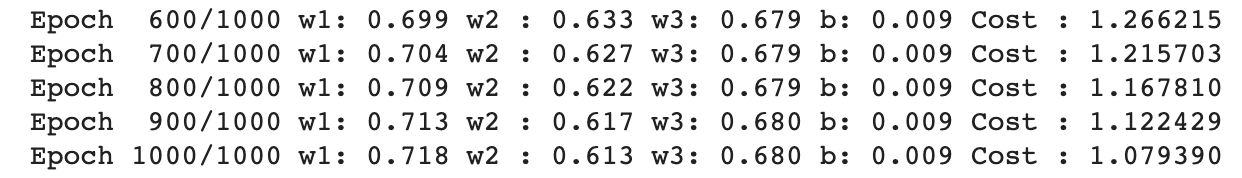 

그렇다고 해서 learning Rate 를 높일 경우 nan 이 뜨는데, 이 경우는 발산했다고 할 수 있다.  
> epochs 100000
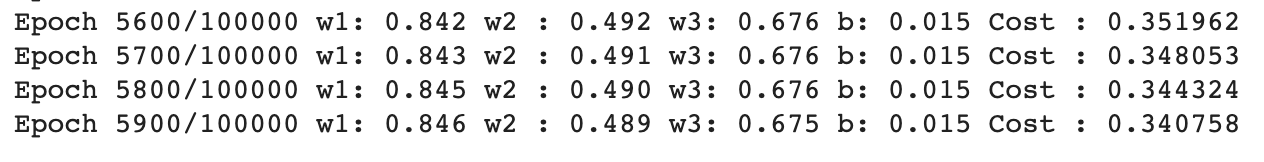
최종적으로 cost 가 0 에 가까워지고 있음을 볼 수 있다.

#Matrix Data Representation

Navie 하지 않고, 행렬로 데이터를 준다면 좀 더 의미있는 값들이 나올 것 이다.

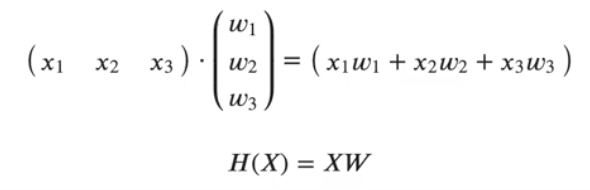

In [ ]:
#Data

x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])


In [ ]:
print(x_train.shape)
print(y_train.shape)

print(W)
print(b)

torch.Size([5, 3])
torch.Size([5, 1])
tensor([[0.6698],
        [0.6670],
        [0.6752]], requires_grad=True)
tensor([0.0092], requires_grad=True)


In [ ]:
#Initialize Motel
#w1 = torch.zeros(1, requires_grad=True)
#w2 = torch.zeros(1, requires_grad=True)
#w3 = torch.zeros(1, requires_grad=True)
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#optimizer setting
optimizer = optim.SGD([W,b], lr = 1e-5)

nb_epochs = 20
for epoch in range(nb_epochs +1):
  #H(x) 계산
  #hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
  #하나씩 계산했는데, 매트릭스 연산이라는게 따로 존재함.
  hypothesis = x_train.matmul(W) + b


  #cost 계산
  cost = torch.mean((hypothesis - y_train)**2)

  #cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  
  
  print('Epoch {:4d}/{} hypothesis: {} Cost : {:.6f}'.format(
      epoch,nb_epochs, hypothesis.squeeze().detach(), cost.item()
      ))


Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost : 29661.800781
Epoch    1/20 hypothesis: tensor([66.9154, 80.7831, 79.5976, 86.6786, 61.6179]) Cost : 9318.728516
Epoch    2/20 hypothesis: tensor([104.4196, 126.0601, 124.2099, 135.2596,  96.1534]) Cost : 2928.327637
Epoch    3/20 hypothesis: tensor([125.4396, 151.4368, 149.2139, 162.4880, 115.5097]) Cost : 920.901489
Epoch    4/20 hypothesis: tensor([137.2206, 165.6599, 163.2280, 177.7488, 126.3586]) Cost : 290.304993
Epoch    5/20 hypothesis: tensor([143.8234, 173.6317, 171.0825, 186.3020, 132.4393]) Cost : 92.214676
Epoch    6/20 hypothesis: tensor([147.5240, 178.0998, 175.4847, 191.0959, 135.8475]) Cost : 29.987661
Epoch    7/20 hypothesis: tensor([149.5979, 180.6042, 177.9520, 193.7827, 137.7579]) Cost : 10.439982
Epoch    8/20 hypothesis: tensor([150.7601, 182.0079, 179.3347, 195.2885, 138.8288]) Cost : 4.299091
Epoch    9/20 hypothesis: tensor([151.4113, 182.7948, 180.1097, 196.1324, 139.4291]) Cost : 2.369742
Epoch   

In [ ]:
print(W)
print(b)

tensor([[0.6698],
        [0.6670],
        [0.6752]], requires_grad=True)
tensor([0.0092], requires_grad=True)
